In [32]:
import pandas as pd

In [33]:
dataframe = pd.read_csv("./business_analysis.csv")

In [34]:
dataframe.columns

Index(['index', 'name', 'category', 'category_group', 'address', 'city',
       'neighborhood', 'latitude', 'longitude', 'phone', 'website', 'rating',
       'photo_count', 'reviews_with_text', 'price_level', 'has_phone',
       'has_website', 'has_photos', 'needs_website', 'data_completeness',
       'overall_quality', 'is_good_candidate', 'is_premium_candidate'],
      dtype='str')

In [35]:
dataframe.shape

(2014, 23)

In [36]:
dataframe.head(5)

,index,name,category,category_group,address,city,neighborhood,latitude,longitude,phone,...,reviews_with_text,price_level,has_phone,has_website,has_photos,needs_website,data_completeness,overall_quality,is_good_candidate,is_premium_candidate
0,0,DermoBeauty · Villa Morra,Centro de estética,Beauty & Personal Care,\nDoctor Francisco Morra Nº 717 casi Eusebio ...,Villa Morra,Villa Morra,-25.290748,-57.58671,\n0981 673700,...,0,NaN,True,True,True,False,100.0,7.2,True,False
1,1,Marie Carol Beauty & Lifestyle,Centro de estética,Beauty & Personal Care,"\nEdificio Atrium, Dr. Francisco Morra y, Asu...",Villa Morra,Villa Morra,-25.290748,-57.58671,\n0986 610300,...,0,NaN,True,True,True,False,100.0,7.2,True,False
2,2,101 Beauty Studio,Centro de estética,Beauty & Personal Care,\nSenador Huey Pierce Long 250 Entre Guido Sp...,Villa Morra,Villa Morra,-25.290748,-57.58671,\n0976 564224,...,0,NaN,True,True,True,False,100.0,7.2,True,False
3,3,Maison Mint,Peluquería,Beauty & Personal Care,"\nEusebio Lillo Robles esquina, Asunción 001411",Villa Morra,Villa Morra,-25.290748,-57.58671,\n0981 301077,...,0,NaN,True,False,True,True,100.0,7.2,True,False
4,4,Charme,Cuidado del cabello,Other,"\nShopping Villa Morra, Av. Mariscal López Lo...",Villa Morra,Villa Morra,-25.290748,-57.58671,\n(021) 612 899,...,0,NaN,True,False,True,True,100.0,7.1,True,False


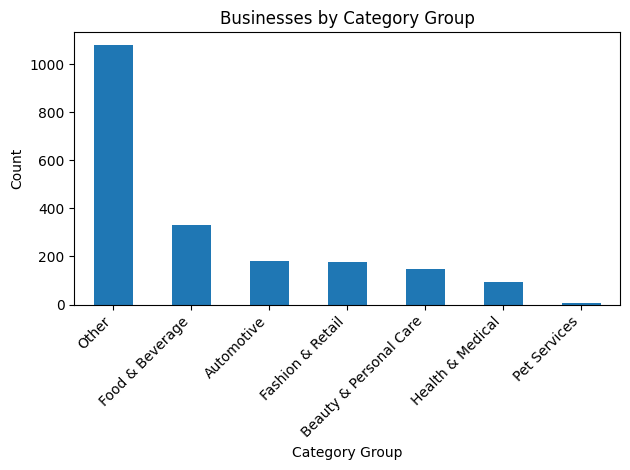

In [37]:
import matplotlib.pyplot as plt

dataframe['category_group'].value_counts().plot(kind='bar')
plt.title("Businesses by Category Group")
plt.xlabel("Category Group")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.tight_layout()
plt.show()


KeyError: 'review_count'

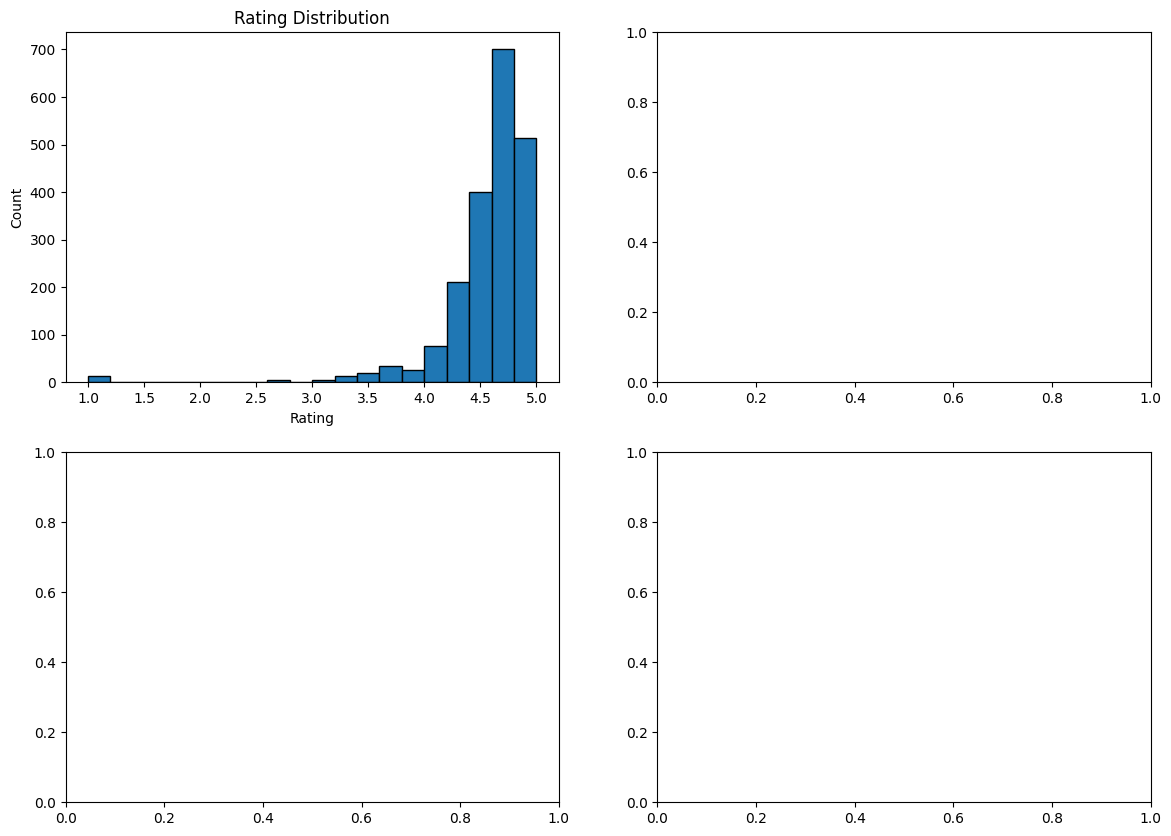

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Rating distribution
axes[0, 0].hist(dataframe['rating'].dropna(), bins=20, edgecolor='black')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')

# 2. Review count distribution (log scale for better visualization)
axes[0, 1].hist(dataframe['review_count'].dropna(), bins=30, edgecolor='black')
axes[0, 1].set_title('Review Count Distribution')
axes[0, 1].set_xlabel('Review Count')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_yscale('log')

# 3. Engagement level distribution
dataframe['engagement_level'].value_counts().plot(kind='bar', ax=axes[1, 0], color=['green', 'orange', 'red'])
axes[1, 0].set_title('Engagement Level Distribution')
axes[1, 0].set_xlabel('Engagement Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Top 10 cities by business count
dataframe['city'].value_counts().head(10).plot(kind='barh', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Cities by Business Count')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('City')

plt.tight_layout()
plt.show()

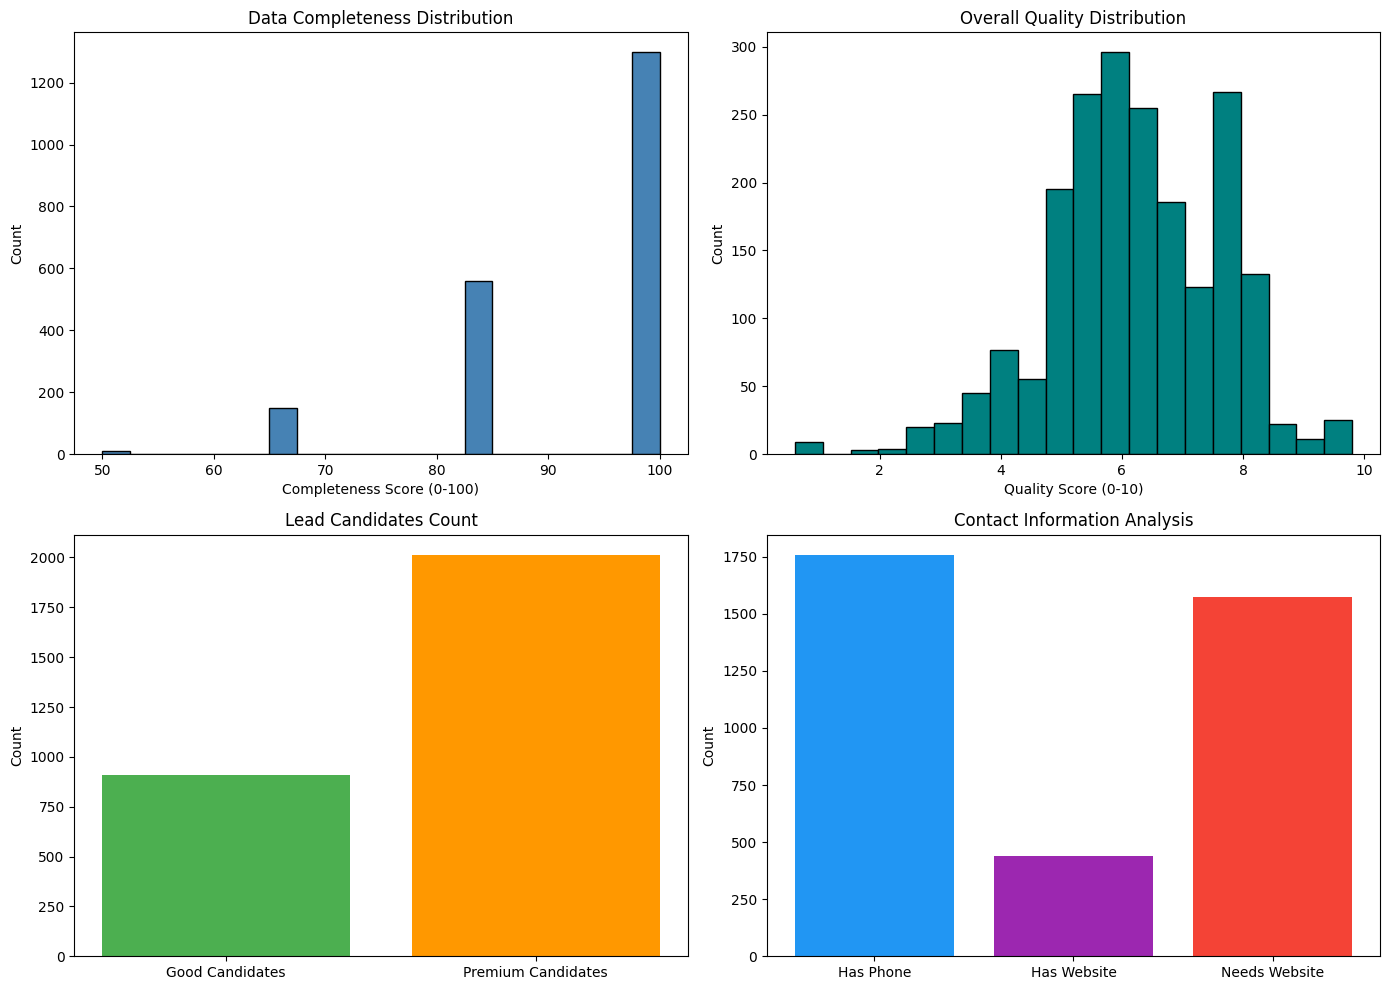

=== DATA INSIGHTS ===
Total businesses: 2014
Average rating: 4.57
Average review count: 13.0
Good candidates: 907 (45.0%)
Businesses needing websites: 1573 (78.1%)
Average data completeness: 92.7%


In [ ]:
# Data Quality & Lead Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Data Completeness Distribution
axes[0, 0].hist(dataframe['data_completeness'].dropna(), bins=20, edgecolor='black', color='steelblue')
axes[0, 0].set_title('Data Completeness Distribution')
axes[0, 0].set_xlabel('Completeness Score (0-100)')
axes[0, 0].set_ylabel('Count')

# 2. Overall Quality Distribution
axes[0, 1].hist(dataframe['overall_quality'].dropna(), bins=20, edgecolor='black', color='teal')
axes[0, 1].set_title('Overall Quality Distribution')
axes[0, 1].set_xlabel('Quality Score (0-10)')
axes[0, 1].set_ylabel('Count')

# 3. Good Candidates vs Premium Candidates
candidate_data = [dataframe['is_good_candidate'].sum(), dataframe['is_premium_candidate'].notna().sum()]
axes[1, 0].bar(['Good Candidates', 'Premium Candidates'], candidate_data, color=['#4CAF50', '#FF9800'])
axes[1, 0].set_title('Lead Candidates Count')
axes[1, 0].set_ylabel('Count')

# 4. Contact Info Analysis
contact_data = {
    'Has Phone': dataframe['has_phone'].sum(),
    'Has Website': dataframe['has_website'].sum(),
    'Needs Website': dataframe['needs_website'].sum()
}
axes[1, 1].bar(contact_data.keys(), contact_data.values(), color=['#2196F3', '#9C27B0', '#F44336'])
axes[1, 1].set_title('Contact Information Analysis')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Key Statistic
print("=== DATA INSIGHTS ===")
print(f"Total businesses: {len(dataframe)}")
print(f"Average rating: {dataframe['rating'].mean():.2f}")
print(f"Average review count: {dataframe['review_count'].mean():.1f}")
print(f"Good candidates: {dataframe['is_good_candidate'].sum()} ({dataframe['is_good_candidate'].mean()*100:.1f}%)")
print(f"Businesses needing websites: {dataframe['needs_website'].sum()} ({dataframe['needs_website'].mean()*100:.1f}%)")
print(f"Average data completeness: {dataframe['data_completeness'].mean():.1f}%")

In [ ]:
# Análisis de candidatos y páginas web
print("=== ANÁLISIS DE CANDIDATOS Y WEBSITES ===\n")

# Candidatos buenos
good_candidates = dataframe['is_good_candidate'].sum()
print(f"Candidatos buenos: {good_candidates}")

# Candidatos premium (contando valores no nulos que no sean False)
premium_candidates = dataframe['is_premium_candidate'].notna().sum()
premium_true = dataframe['is_premium_candidate'].dropna()
print(f"Candidatos premium (registros con datos): {premium_candidates}")

# Análisis de páginas web
total_registros = len(dataframe)
sin_website = dataframe['has_website'].sum() == 0  # Si ninguno tiene website
necesitan_website = dataframe['needs_website'].sum()

print(f"\n=== ANÁLISIS DE WEBSITES ===")
print(f"Total de registros: {total_registros}")
print(f"Registros CON website: {dataframe['has_website'].sum()}")
print(f"Registros SIN website: {(~dataframe['has_website'].astype(bool)).sum()}")
print(f"Registros que NECESITAN website: {necesitan_website} ({necesitan_website/total_registros*100:.1f}%)")


=== ANÁLISIS DE CANDIDATOS Y WEBSITES ===

Candidatos buenos: 907
Candidatos premium (registros con datos): 2014

=== ANÁLISIS DE WEBSITES ===
Total de registros: 2014
Registros CON website: 441
Registros SIN website: 1573
Registros que NECESITAN website: 1573 (78.1%)


In [ ]:
# Análisis de mejores prospectos para venta de websites
print("=== TOP PROSPECTOS PARA VENTA DE WEBSITES ===\n")

# Crear un score de probabilidad de compra basado en múltiples factores
prospects = dataframe[dataframe['needs_website'] == True].copy()

# Calcular score de prospecto
prospects['prospect_score'] = (
    prospects['rating'].fillna(0) * 2 +  # Buen rating = negocio establecido
    prospects['review_count'].clip(upper=500).fillna(0) / 50 +  # Reviews = actividad
    prospects['has_phone'].astype(int) * 3 +  # Tiene teléfono = contactable
    prospects['data_completeness'].fillna(0) / 10 +  # Datos completos = negocio organizado
    prospects['is_good_candidate'].astype(int) * 5 +  # Ya identificado como buen candidato
    (prospects['engagement_level'] == 'High').astype(int) * 3  # Alto engagement
)

# Ordenar por score
top_prospects = prospects.nlargest(20, 'prospect_score')[['name', 'category', 'city', 'rating', 'review_count', 'has_phone', 'phone', 'engagement_level', 'data_completeness', 'prospect_score']]

print(f"Total de negocios que necesitan website: {len(prospects)}")
print(f"Negocios con alta probabilidad de compra (score > 20): {len(prospects[prospects['prospect_score'] > 20])}\n")

print("=== TOP 20 MEJORES PROSPECTOS ===\n")
display(top_prospects)

# Resumen por categoría
print("\n=== DISTRIBUCIÓN POR CATEGORÍA (Top prospectos) ===")
print(top_prospects['category'].value_counts())

=== TOP PROSPECTOS PARA VENTA DE WEBSITES ===

Total de negocios que necesitan website: 1573
Negocios con alta probabilidad de compra (score > 20): 1322

=== TOP 20 MEJORES PROSPECTOS ===



,name,category,city,rating,review_count,has_phone,phone,engagement_level,data_completeness,prospect_score
670,Nai Flores,Floristería,Sajonia,4.5,479,True,\n0985 108611,High,100.0,39.58
1857,Panadería La Palmera SA,Panadería,Centro,4.6,362,True,\n0991 833530,High,100.0,37.44
1700,Q nails club spa de manos y pies,Salón de manicura y pedicura,Villa Morra,4.7,322,True,\n0972 999688,High,100.0,36.84
1701,Alteza Nails,Spa,Villa Morra,4.7,322,True,\n0994 233552,High,100.0,36.84
1702,RVG NAILS STUDIO - VILLA MORRA,Spa,Villa Morra,4.7,322,True,\n0994 200811,High,100.0,36.84
1710,"LADY, Bar de uñas",Centro de estética,Villa Morra,4.7,322,True,\n0987 129898,High,100.0,36.84
1463,Essencial Spa,Spa,Luque,4.6,280,True,\n0982 338886,High,100.0,35.80
1465,MONCHO (HAIR SALON SPA),Centro de estética,Luque,4.6,280,True,\n0992 344654,High,100.0,35.80
1466,Christian Amarilla Beauty Salón,Centro de estética,Luque,4.6,280,True,\n0994 213563,High,100.0,35.80
1863,Chaval Recoleta,Panadería,Recoleta,4.7,242,True,\n0976 890359,High,100.0,35.24



=== DISTRIBUCIÓN POR CATEGORÍA (Top prospectos) ===
category
Panadería                       3
Spa                             3
Centro de estética              3
Restaurante                     3
Hamburguesería                  2
Tienda de ropa de mujer         2
Floristería                     1
Salón de manicura y pedicura    1
Pastelería                      1
Tienda naturista                1
Name: count, dtype: int64


In [ ]:
# Check if review_count values are duplicated across many businesses
print("=== DIAGNÓSTICO DE DATOS ===\n")

# Check most common review_count values
print("Top 10 review_count values más frecuentes:")
print(dataframe['review_count'].value_counts().head(10))

print("\n--- Negocios con review_count = 1768 ---")
print(dataframe[dataframe['review_count'] == 1768][['name', 'city', 'rating', 'review_count']].head(10))

print("\n--- Valores únicos por columna clave ---")
print(f"Unique ratings: {dataframe['rating'].nunique()}")
print(f"Unique review_counts: {dataframe['review_count'].nunique()}")
print(f"Unique data_completeness: {dataframe['data_completeness'].nunique()}")

# Check if values are duplicated by neighborhood
print("\n--- Review count por neighborhood ---")
print(dataframe.groupby('neighborhood')['review_count'].agg(['mean', 'std', 'count']).head(10))

=== DIAGNÓSTICO DE DATOS ===

Top 10 review_count values más frecuentes:
review_count
3     593
0     377
16    172
1     113
14     79
2      79
4      63
5      51
10     42
7      42
Name: count, dtype: int64

--- Negocios con review_count = 1768 ---
Empty DataFrame
Columns: [name, city, rating, review_count]
Index: []

--- Valores únicos por columna clave ---
Unique ratings: 23
Unique review_counts: 60
Unique data_completeness: 4

--- Review count por neighborhood ---
                         mean        std  count
neighborhood                                   
Capiatá             11.275000  10.657819     40
Carmelitas          10.352113   9.336715     71
Centro              12.544236  36.981124    373
Centro Capiatá       8.592593   8.568302     54
Centro Fernando      5.518519   2.242429     27
Centro Histórico    14.500000  20.393946     24
Centro Luque        12.696970   8.446467     33
Centro MRA          15.298246  30.950978     57
Centro San Lorenzo   3.305556   4.314887   

In [ ]:
# Contar candidatos premium reales (excluyendo False y NaN)
premium_real = dataframe['is_premium_candidate'].apply(lambda x: x not in [False, 'False', None] and pd.notna(x)).sum()

print("=== CANDIDATOS PREMIUM ===")
print(f"Total de candidatos premium: {premium_real}")

# Mostrar algunos ejemplos de candidatos premium
premium_df = dataframe[dataframe['is_premium_candidate'].apply(lambda x: x not in [False, 'False', None] and pd.notna(x))]
print(f"\nEjemplos de candidatos premium:")
display(premium_df[['name', 'category', 'city', 'rating', 'phone', 'is_premium_candidate']].head(10))

=== CANDIDATOS PREMIUM ===
Total de candidatos premium: 300

Ejemplos de candidatos premium:


,name,category,city,rating,phone,is_premium_candidate
619,Floreria en Capiatá,Floristería,Centro Capiatá,4.5,\n0982 262915,True
620,Florería pétalo,Floristería,Centro Capiatá,4.5,\n0972 481032,True
621,Floreria Jessica,Mercado de flores,Centro Capiatá,4.5,\n0982 436438,True
622,Floreria Manduará,Floristería,Centro Capiatá,4.5,\n0981 777415,True
623,Floreria Victoria,Floristería,Centro Capiatá,4.5,\n0982 817634,True
625,Florería Isla de Flores,Floristería,Centro Capiatá,4.5,\n0983 216336,True
626,Olivia Flores & Co,Floristería,Centro Capiatá,4.5,\n0962 328139,True
649,Gym Pro Paraguay,Gimnasio,Centro San Lorenzo,4.5,\n0986 874797,True
650,Mirage Sport Center,Gimnasio,Centro San Lorenzo,4.5,\n0986 273555,True
651,ROYAL FITNESS CENTER - SAN LORENZO - PY,Gimnasio,Centro San Lorenzo,4.5,\n0974 551000,True


In [ ]:
print(f"Total de candidatos buenos (good candidates): {dataframe['is_good_candidate'].sum()}")

Total de candidatos buenos (good candidates): 907


In [ ]:
presence_cols = [
    'has_website',
    'has_phone',
    'has_photos',
    'has_opening_hours'
]

presence_rate = dataframe[presence_cols].mean() * 100
presence_rate.plot(kind='bar')
plt.title("Online Presence Coverage (%)")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.show()


KeyError: "['has_opening_hours'] not in index"

In [ ]:
dataframe["review_count"].unique().shape

(60,)

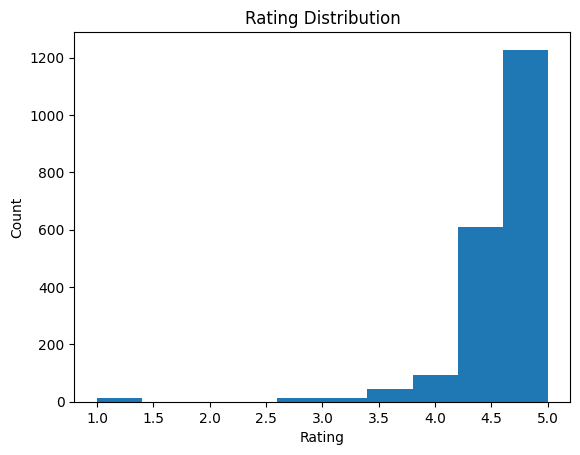

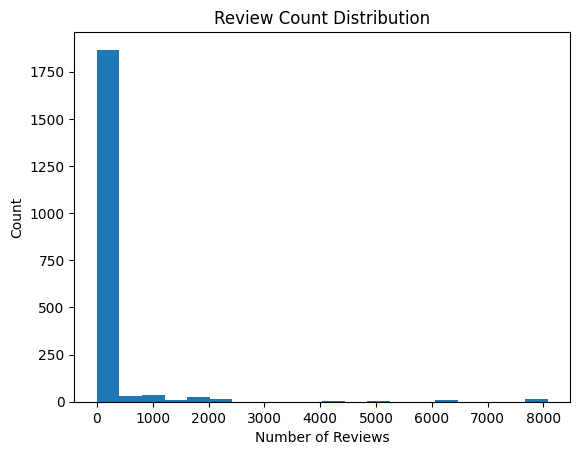

In [ ]:
plt.hist(dataframe['rating'].dropna(), bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

plt.hist(dataframe['review_count'], bins=20)
plt.title("Review Count Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()


In [ ]:
dataframe["review_count"].unique().shape

(60,)

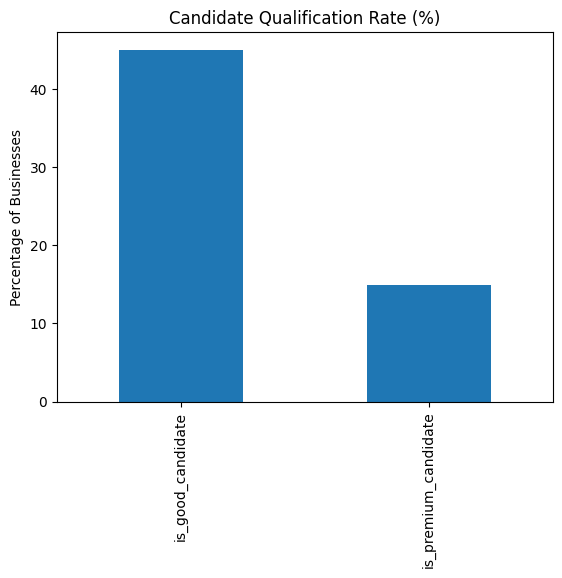

In [ ]:
candidate_counts = dataframe[['is_good_candidate', 'is_premium_candidate']].mean() * 100
candidate_counts.plot(kind='bar')
plt.title("Candidate Qualification Rate (%)")
plt.ylabel("Percentage of Businesses")
plt.show()


# 📊 Comprehensive Data Analysis
Reload the data and create detailed visualizations

In [39]:
# Reload fresh data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./business_analysis.csv")
print(f"📦 Total businesses: {len(df)}")
print(f"📋 Columns: {list(df.columns)}")

📦 Total businesses: 2014
📋 Columns: ['index', 'name', 'category', 'category_group', 'address', 'city', 'neighborhood', 'latitude', 'longitude', 'phone', 'website', 'rating', 'photo_count', 'reviews_with_text', 'price_level', 'has_phone', 'has_website', 'has_photos', 'needs_website', 'data_completeness', 'overall_quality', 'is_good_candidate', 'is_premium_candidate']


/var/folders/r7/dbv5f4xd49191l42tlc3_c8r0000gn/T/ipykernel_14997/2103074123.py:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/nicolasvargas/Desktop/Code/webpageAutomatization/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


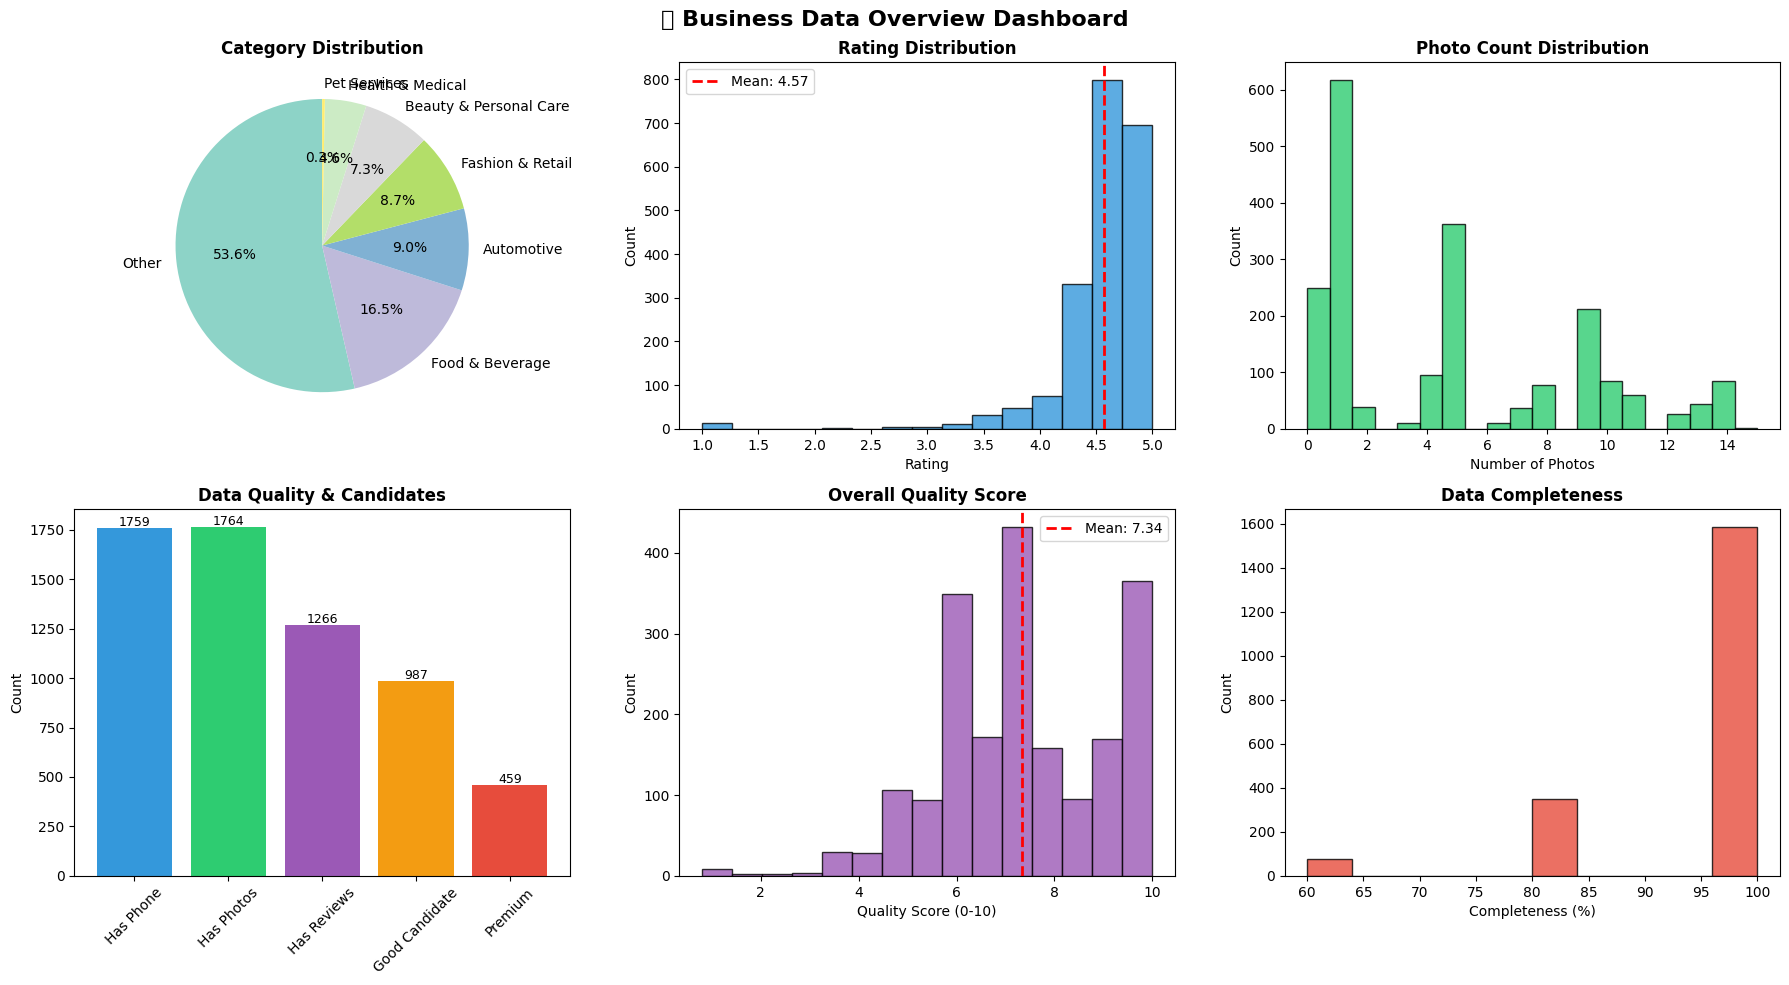


📊 KEY STATISTICS
Total businesses: 2,014
Average rating: 4.57 ⭐
Average photos: 4.7 📷
Average quality score: 7.34/10
Good candidates: 987 (49.0%)
Premium candidates: 459 (22.8%)


In [40]:
# 📈 DASHBOARD: Key Metrics Overview
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 Business Data Overview Dashboard', fontsize=16, fontweight='bold')

# 1. Category Group Distribution (Pie)
cat_counts = df['category_group'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(cat_counts)))
axes[0, 0].pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Category Distribution', fontweight='bold')

# 2. Rating Distribution
axes[0, 1].hist(df['rating'].dropna(), bins=15, edgecolor='black', color='#3498db', alpha=0.8)
axes[0, 1].axvline(df['rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["rating"].mean():.2f}')
axes[0, 1].set_title('Rating Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()

# 3. Photo Count Distribution
axes[0, 2].hist(df['photo_count'].dropna(), bins=20, edgecolor='black', color='#2ecc71', alpha=0.8)
axes[0, 2].set_title('Photo Count Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Number of Photos')
axes[0, 2].set_ylabel('Count')

# 4. Data Quality Metrics
quality_metrics = {
    'Has Phone': df['has_phone'].sum(),
    'Has Photos': df['has_photos'].sum(),
    'Has Reviews': (df['reviews_with_text'] > 0).sum(),
    'Good Candidate': df['is_good_candidate'].sum(),
    'Premium': df['is_premium_candidate'].sum()
}
bars = axes[1, 0].bar(quality_metrics.keys(), quality_metrics.values(), color=['#3498db', '#2ecc71', '#9b59b6', '#f39c12', '#e74c3c'])
axes[1, 0].set_title('Data Quality & Candidates', fontweight='bold')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
for bar, val in zip(bars, quality_metrics.values()):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, str(val), ha='center', fontsize=9)

# 5. Overall Quality Score Distribution
axes[1, 1].hist(df['overall_quality'].dropna(), bins=15, edgecolor='black', color='#9b59b6', alpha=0.8)
axes[1, 1].axvline(df['overall_quality'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["overall_quality"].mean():.2f}')
axes[1, 1].set_title('Overall Quality Score', fontweight='bold')
axes[1, 1].set_xlabel('Quality Score (0-10)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend()

# 6. Data Completeness
axes[1, 2].hist(df['data_completeness'].dropna(), bins=10, edgecolor='black', color='#e74c3c', alpha=0.8)
axes[1, 2].set_title('Data Completeness', fontweight='bold')
axes[1, 2].set_xlabel('Completeness (%)')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary stats
print("\n" + "="*60)
print("📊 KEY STATISTICS")
print("="*60)
print(f"Total businesses: {len(df):,}")
print(f"Average rating: {df['rating'].mean():.2f} ⭐")
print(f"Average photos: {df['photo_count'].mean():.1f} 📷")
print(f"Average quality score: {df['overall_quality'].mean():.2f}/10")
print(f"Good candidates: {df['is_good_candidate'].sum():,} ({df['is_good_candidate'].mean()*100:.1f}%)")
print(f"Premium candidates: {df['is_premium_candidate'].sum():,} ({df['is_premium_candidate'].mean()*100:.1f}%)")

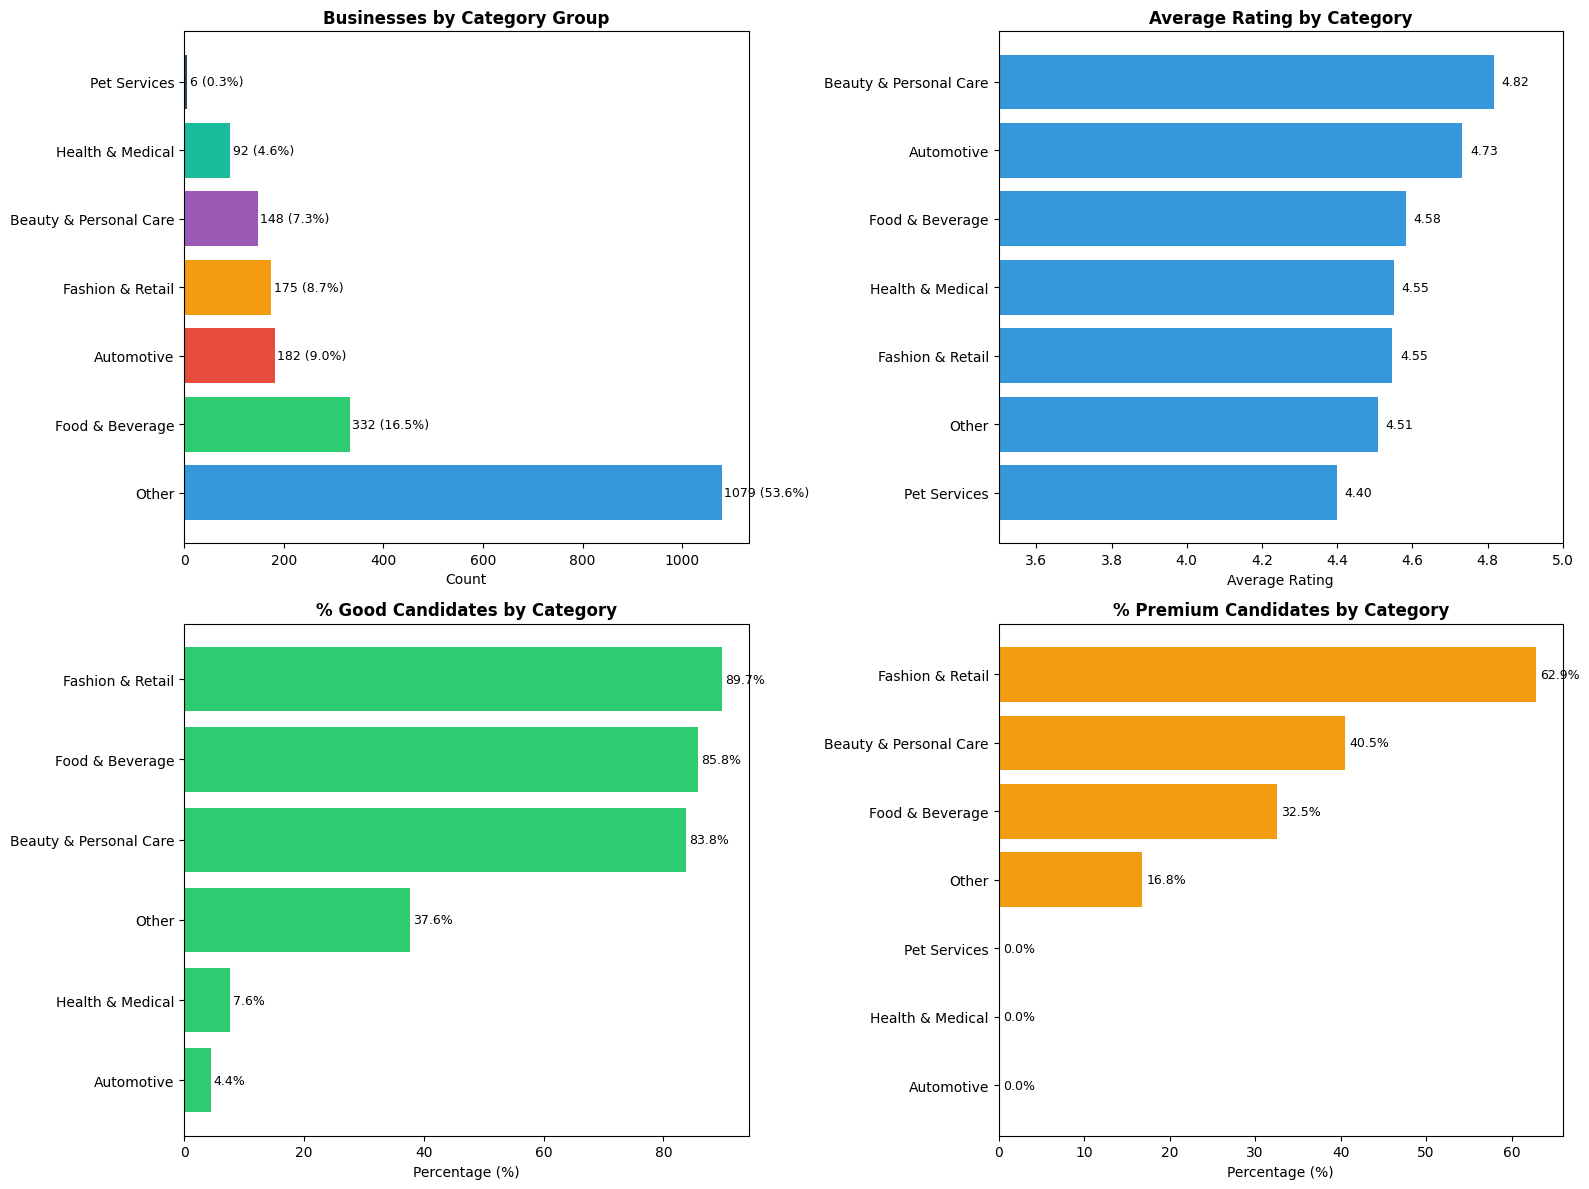

In [41]:
# 📂 CATEGORY ANALYSIS: Deep Dive by Business Type
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Category Groups - Horizontal Bar with counts
cat_counts = df['category_group'].value_counts()
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c', '#34495e']
bars = axes[0, 0].barh(cat_counts.index, cat_counts.values, color=colors[:len(cat_counts)])
axes[0, 0].set_title('Businesses by Category Group', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Count')
for bar, val in zip(bars, cat_counts.values):
    axes[0, 0].text(val + 5, bar.get_y() + bar.get_height()/2, f'{val} ({val/len(df)*100:.1f}%)', va='center', fontsize=9)

# 2. Average Rating by Category
rating_by_cat = df.groupby('category_group')['rating'].mean().sort_values(ascending=True)
bars = axes[0, 1].barh(rating_by_cat.index, rating_by_cat.values, color='#3498db')
axes[0, 1].set_title('Average Rating by Category', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_xlim(3.5, 5)
for bar, val in zip(bars, rating_by_cat.values):
    axes[0, 1].text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center', fontsize=9)

# 3. Good Candidates by Category
good_by_cat = df[df['is_good_candidate'] == True].groupby('category_group').size()
total_by_cat = df.groupby('category_group').size()
pct_good = (good_by_cat / total_by_cat * 100).sort_values(ascending=True)
bars = axes[1, 0].barh(pct_good.index, pct_good.values, color='#2ecc71')
axes[1, 0].set_title('% Good Candidates by Category', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Percentage (%)')
for bar, val in zip(bars, pct_good.values):
    axes[1, 0].text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)

# 4. Premium Candidates by Category
premium_by_cat = df[df['is_premium_candidate'] == True].groupby('category_group').size()
pct_premium = (premium_by_cat / total_by_cat * 100).fillna(0).sort_values(ascending=True)
bars = axes[1, 1].barh(pct_premium.index, pct_premium.values, color='#f39c12')
axes[1, 1].set_title('% Premium Candidates by Category', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Percentage (%)')
for bar, val in zip(bars, pct_premium.values):
    axes[1, 1].text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

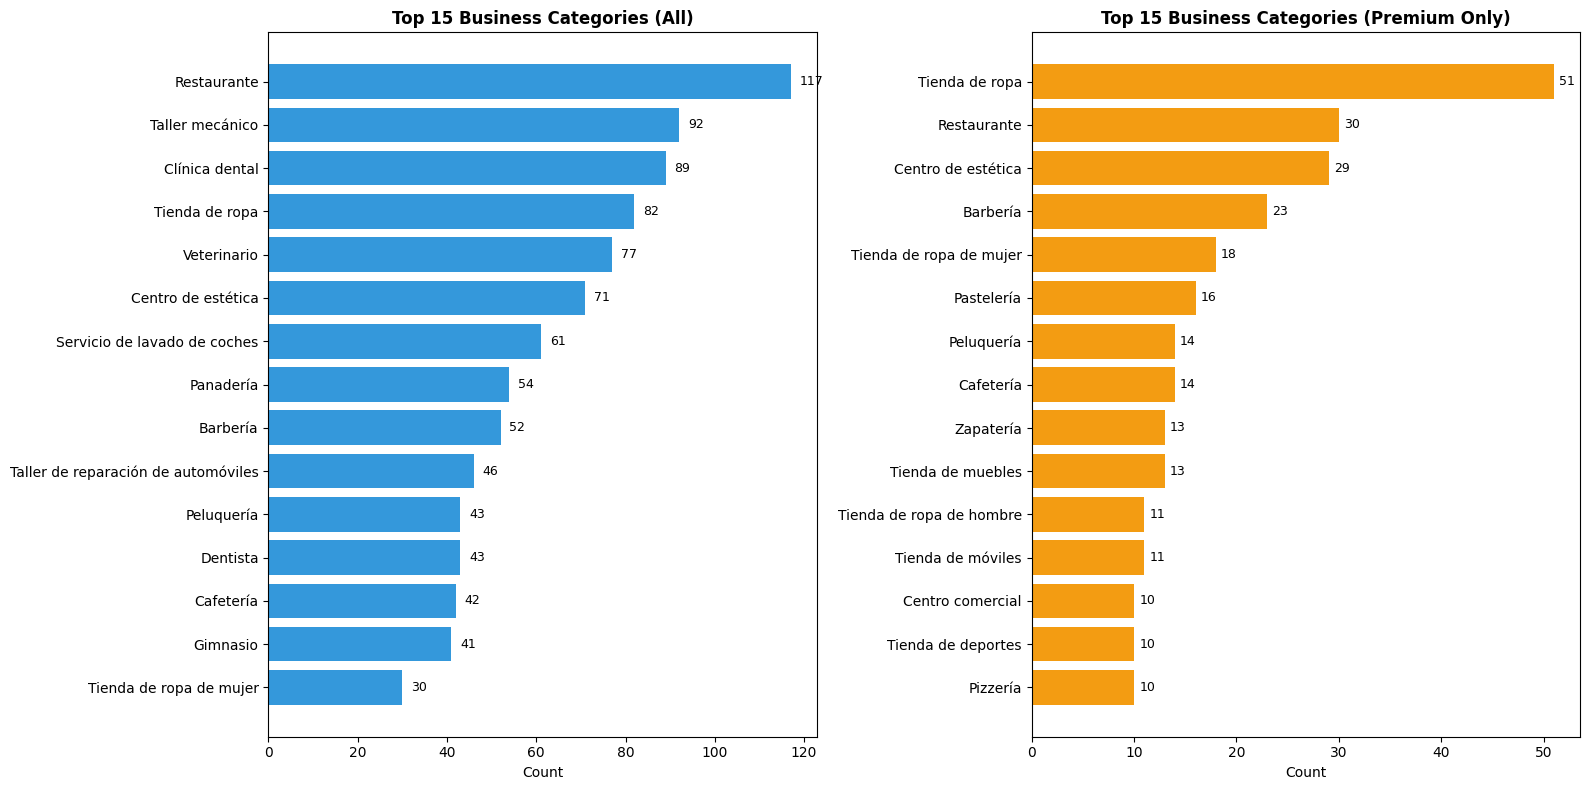


📊 Top categories for premium leads:
   • Tienda de ropa: 51 (11.1%)
   • Restaurante: 30 (6.5%)
   • Centro de estética: 29 (6.3%)
   • Barbería: 23 (5.0%)
   • Tienda de ropa de mujer: 18 (3.9%)
   • Pastelería: 16 (3.5%)
   • Peluquería: 14 (3.1%)
   • Cafetería: 14 (3.1%)
   • Zapatería: 13 (2.8%)
   • Tienda de muebles: 13 (2.8%)


In [42]:
# 🏆 TOP 15 SPECIFIC BUSINESS CATEGORIES
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 1. Top 15 Categories Overall
top_categories = df['category'].value_counts().head(15)
bars = axes[0].barh(top_categories.index[::-1], top_categories.values[::-1], color='#3498db')
axes[0].set_title('Top 15 Business Categories (All)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Count')
for bar, val in zip(bars, top_categories.values[::-1]):
    axes[0].text(val + 2, bar.get_y() + bar.get_height()/2, str(val), va='center', fontsize=9)

# 2. Top 15 Premium Categories
premium_df = df[df['is_premium_candidate'] == True]
top_premium = premium_df['category'].value_counts().head(15)
bars = axes[1].barh(top_premium.index[::-1], top_premium.values[::-1], color='#f39c12')
axes[1].set_title('Top 15 Business Categories (Premium Only)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Count')
for bar, val in zip(bars, top_premium.values[::-1]):
    axes[1].text(val + 0.5, bar.get_y() + bar.get_height()/2, str(val), va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n📊 Top categories for premium leads:")
for cat, count in top_premium.head(10).items():
    pct = count / premium_df.shape[0] * 100
    print(f"   • {cat}: {count} ({pct:.1f}%)")

In [ ]:
# 🗺️ GEOGRAPHIC ANALYSIS: Cities & Neighborhoods
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Top Cities
city_counts = df['city'].value_counts().head(10)
bars = axes[0].barh(city_counts.index[::-1], city_counts.values[::-1], color='#1abc9c')
axes[0].set_title('Top 10 Cities', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Number of Businesses')
for bar, val in zip(bars, city_counts.values[::-1]):
    axes[0].text(val + 5, bar.get_y() + bar.get_height()/2, f'{val} ({val/len(df)*100:.1f}%)', va='center', fontsize=9)

# 2. Top Neighborhoods
neighborhood_counts = df['neighborhood'].value_counts().head(15)
bars = axes[1].barh(neighborhood_counts.index[::-1], neighborhood_counts.values[::-1], color='#9b59b6')
axes[1].set_title('Top 15 Neighborhoods', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Number of Businesses')
for bar, val in zip(bars, neighborhood_counts.values[::-1]):
    axes[1].text(val + 1, bar.get_y() + bar.get_height()/2, str(val), va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Geographic summary
print("\n" + "="*60)
print("🗺️ GEOGRAPHIC SUMMARY")
print("="*60)
print(f"Total unique cities: {df['city'].nunique()}")
print(f"Total unique neighborhoods: {df['neighborhood'].nunique()}")
print(f"\nTop 5 cities:")
for city, count in city_counts.head(5).items():
    print(f"   • {city}: {count} businesses ({count/len(df)*100:.1f}%)")

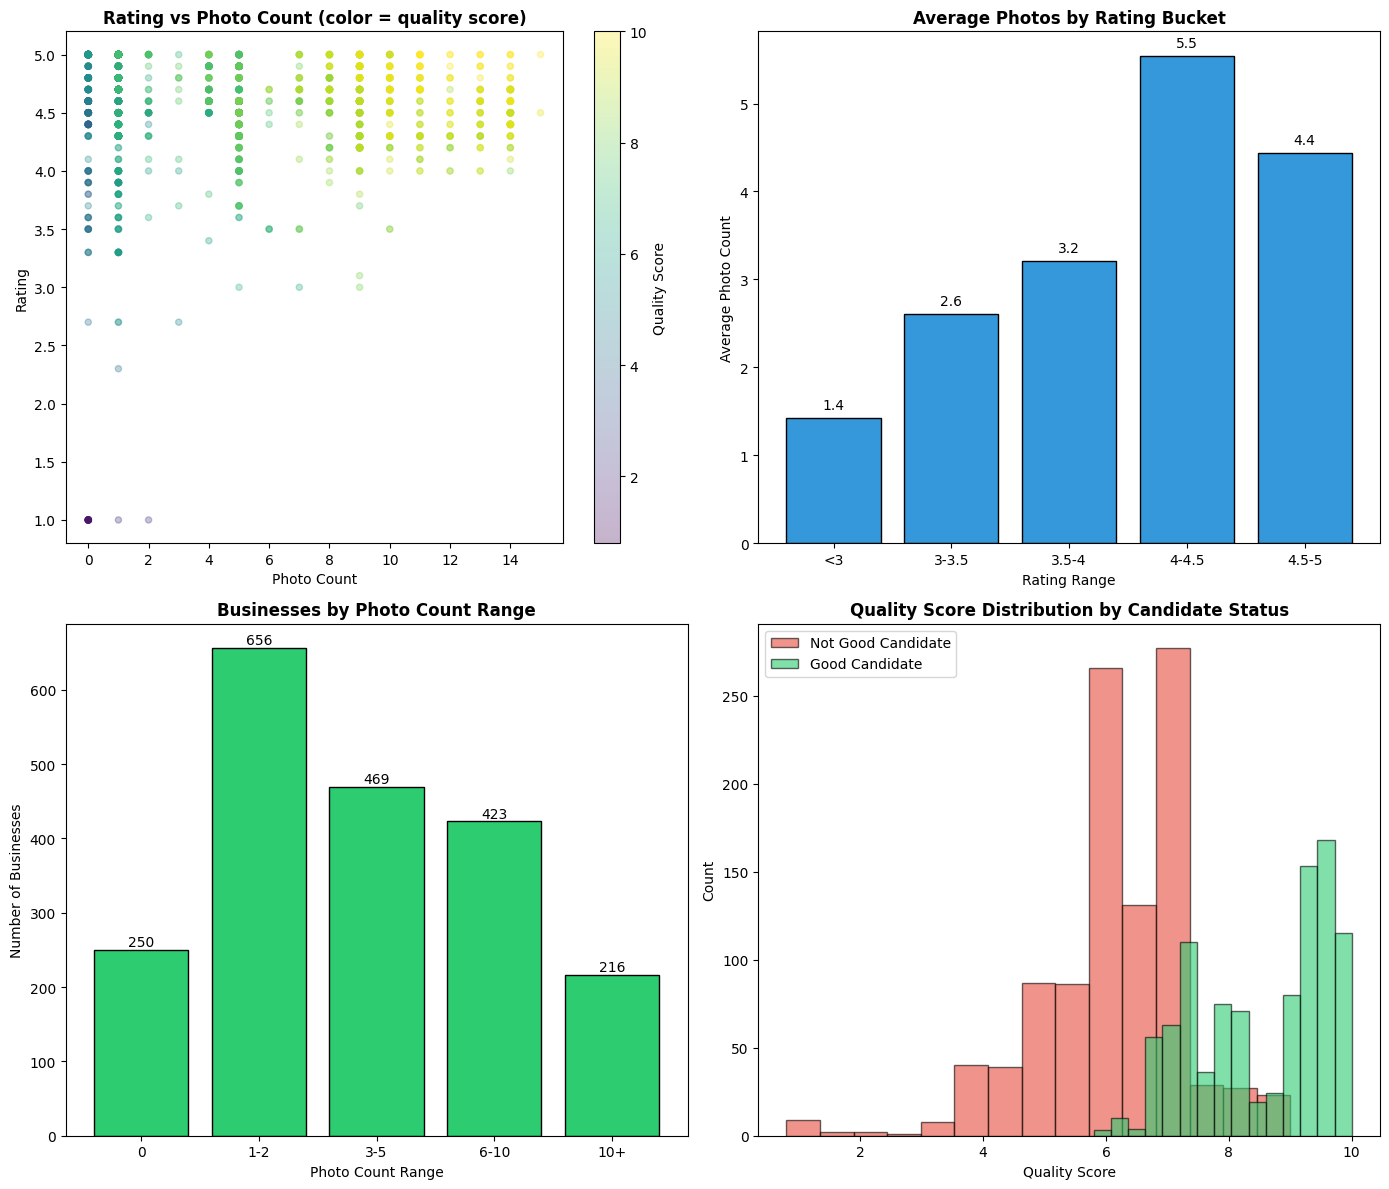

In [43]:
# 📊 RATING vs PHOTOS CORRELATION & QUALITY ANALYSIS
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Rating vs Photo Count Scatter
scatter = axes[0, 0].scatter(df['photo_count'], df['rating'], alpha=0.3, c=df['overall_quality'], cmap='viridis', s=20)
axes[0, 0].set_title('Rating vs Photo Count (color = quality score)', fontweight='bold')
axes[0, 0].set_xlabel('Photo Count')
axes[0, 0].set_ylabel('Rating')
plt.colorbar(scatter, ax=axes[0, 0], label='Quality Score')

# 2. Rating Buckets Analysis
df['rating_bucket'] = pd.cut(df['rating'], bins=[0, 3, 3.5, 4, 4.5, 5], labels=['<3', '3-3.5', '3.5-4', '4-4.5', '4.5-5'])
rating_photo_avg = df.groupby('rating_bucket')['photo_count'].mean()
bars = axes[0, 1].bar(rating_photo_avg.index.astype(str), rating_photo_avg.values, color='#3498db', edgecolor='black')
axes[0, 1].set_title('Average Photos by Rating Bucket', fontweight='bold')
axes[0, 1].set_xlabel('Rating Range')
axes[0, 1].set_ylabel('Average Photo Count')
for bar, val in zip(bars, rating_photo_avg.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'{val:.1f}', ha='center', fontsize=10)

# 3. Photo Count Buckets
df['photo_bucket'] = pd.cut(df['photo_count'], bins=[-1, 0, 2, 5, 10, 100], labels=['0', '1-2', '3-5', '6-10', '10+'])
photo_bucket_counts = df['photo_bucket'].value_counts().sort_index()
bars = axes[1, 0].bar(photo_bucket_counts.index.astype(str), photo_bucket_counts.values, color='#2ecc71', edgecolor='black')
axes[1, 0].set_title('Businesses by Photo Count Range', fontweight='bold')
axes[1, 0].set_xlabel('Photo Count Range')
axes[1, 0].set_ylabel('Number of Businesses')
for bar, val in zip(bars, photo_bucket_counts.values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, str(val), ha='center', fontsize=10)

# 4. Quality Score vs Candidate Status
good_quality = df[df['is_good_candidate'] == True]['overall_quality']
not_good_quality = df[df['is_good_candidate'] == False]['overall_quality']
axes[1, 1].hist(not_good_quality, bins=15, alpha=0.6, label='Not Good Candidate', color='#e74c3c', edgecolor='black')
axes[1, 1].hist(good_quality, bins=15, alpha=0.6, label='Good Candidate', color='#2ecc71', edgecolor='black')
axes[1, 1].set_title('Quality Score Distribution by Candidate Status', fontweight='bold')
axes[1, 1].set_xlabel('Quality Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

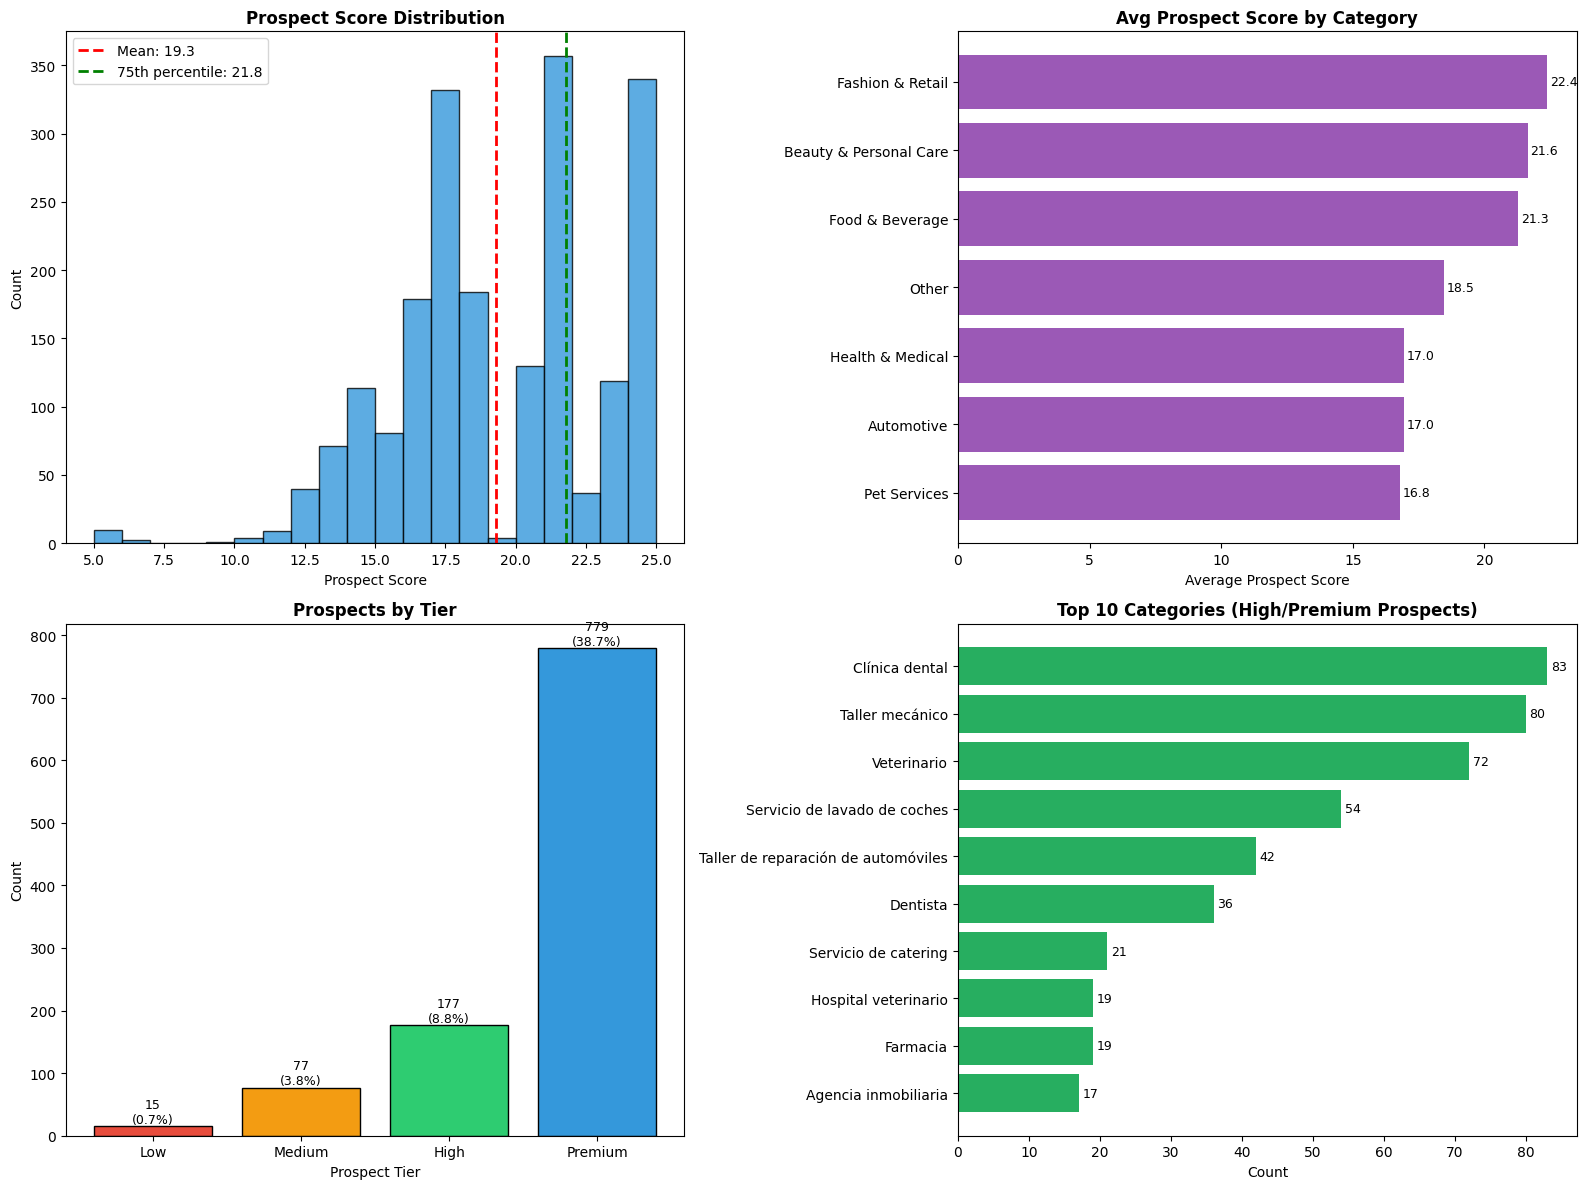


🎯 LEAD SCORING SUMMARY
Total prospects analyzed: 2014

Prospect Tiers:
   Premium: 779 (38.7%)
   High: 177 (8.8%)
   Medium: 77 (3.8%)
   Low: 15 (0.7%)

Top 5 categories for High/Premium prospects:
   • Clínica dental: 83
   • Taller mecánico: 80
   • Veterinario: 72
   • Servicio de lavado de coches: 54
   • Taller de reparación de automóviles: 42


In [44]:
# 🎯 LEAD SCORING: Best Prospects for Website Sales
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Calculate prospect score (without review_count)
df['prospect_score'] = (
    df['rating'].fillna(0) * 2 +          # Rating importance
    df['has_phone'].astype(int) * 3 +     # Contactable
    (df['photo_count'].clip(upper=10) / 10) * 2 +  # Photos = established
    df['data_completeness'].fillna(0) / 20 +  # Organized business
    df['is_good_candidate'].astype(int) * 3 +   # Good candidate bonus
    df['is_premium_candidate'].astype(int) * 2  # Premium bonus
)

# 1. Prospect Score Distribution
axes[0, 0].hist(df['prospect_score'], bins=20, edgecolor='black', color='#3498db', alpha=0.8)
axes[0, 0].axvline(df['prospect_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["prospect_score"].mean():.1f}')
axes[0, 0].axvline(df['prospect_score'].quantile(0.75), color='green', linestyle='--', linewidth=2, label=f'75th percentile: {df["prospect_score"].quantile(0.75):.1f}')
axes[0, 0].set_title('Prospect Score Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Prospect Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend()

# 2. Average Prospect Score by Category
score_by_cat = df.groupby('category_group')['prospect_score'].mean().sort_values(ascending=True)
bars = axes[0, 1].barh(score_by_cat.index, score_by_cat.values, color='#9b59b6')
axes[0, 1].set_title('Avg Prospect Score by Category', fontweight='bold')
axes[0, 1].set_xlabel('Average Prospect Score')
for bar, val in zip(bars, score_by_cat.values):
    axes[0, 1].text(val + 0.1, bar.get_y() + bar.get_height()/2, f'{val:.1f}', va='center', fontsize=9)

# 3. Prospect Score Tiers
df['prospect_tier'] = pd.cut(df['prospect_score'], bins=[0, 10, 13, 15, 20], labels=['Low', 'Medium', 'High', 'Premium'])
tier_counts = df['prospect_tier'].value_counts().sort_index()
colors = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db']
bars = axes[1, 0].bar(tier_counts.index.astype(str), tier_counts.values, color=colors, edgecolor='black')
axes[1, 0].set_title('Prospects by Tier', fontweight='bold')
axes[1, 0].set_xlabel('Prospect Tier')
axes[1, 0].set_ylabel('Count')
for bar, val in zip(bars, tier_counts.values):
    pct = val / len(df) * 100
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{val}\n({pct:.1f}%)', ha='center', fontsize=9)

# 4. High-value prospects by specific category
high_value = df[df['prospect_tier'].isin(['High', 'Premium'])]
high_by_cat = high_value['category'].value_counts().head(10)
bars = axes[1, 1].barh(high_by_cat.index[::-1], high_by_cat.values[::-1], color='#27ae60')
axes[1, 1].set_title('Top 10 Categories (High/Premium Prospects)', fontweight='bold')
axes[1, 1].set_xlabel('Count')
for bar, val in zip(bars, high_by_cat.values[::-1]):
    axes[1, 1].text(val + 0.5, bar.get_y() + bar.get_height()/2, str(val), va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*60)
print("🎯 LEAD SCORING SUMMARY")
print("="*60)
print(f"Total prospects analyzed: {len(df)}")
print(f"\nProspect Tiers:")
for tier in ['Premium', 'High', 'Medium', 'Low']:
    count = tier_counts.get(tier, 0)
    print(f"   {tier}: {count} ({count/len(df)*100:.1f}%)")
print(f"\nTop 5 categories for High/Premium prospects:")
for cat, count in high_by_cat.head(5).items():
    print(f"   • {cat}: {count}")

In [45]:
# 📋 TOP 30 BEST PROSPECTS TABLE
top_30 = df.nlargest(30, 'prospect_score')[['name', 'category', 'city', 'rating', 'photo_count', 'phone', 'overall_quality', 'prospect_score']]
top_30 = top_30.reset_index(drop=True)
top_30.index = top_30.index + 1  # Start from 1

print("🏆 TOP 30 BEST PROSPECTS FOR WEBSITE SALES")
print("="*100)
display(top_30)

# Export to CSV for easy access
top_30.to_csv('top_prospects.csv', index=True)
print("\n✅ Exported to 'top_prospects.csv'")

🏆 TOP 30 BEST PROSPECTS FOR WEBSITE SALES


,name,category,city,rating,photo_count,phone,overall_quality,prospect_score
1,PAM Paraguay Alta Moda,Tienda de ropa,Villa Morra,5.0,12,\n0981 108001,10.0,25.0
2,APIA Villa Morra,Tienda de ropa de vestir,Villa Morra,5.0,14,\n0971 777678,10.0,25.0
3,Villamorra Shopping,Centro comercial,Villa Morra,5.0,15,\n(021) 603 050,10.0,25.0
4,Anastasia Paraguay Villa Morra,Tienda de ropa de mujer,Villa Morra,5.0,10,\n0986 835871,10.0,25.0
5,Pitonisa Boutique San Martin 1554,Tienda de ropa de mujer,Carmelitas,5.0,10,\n0971 970900,10.0,25.0
6,Renta tu yate py,Compraventa de yates,Villa Morra,5.0,14,\n0961 311666,10.0,25.0
7,El Oro y el Moro,Joyería,Villa Morra,5.0,11,\n(021) 664 049,10.0,25.0
8,Neusa Joyas,Joyería,Villa Morra,5.0,10,\n0981 464763,10.0,25.0
9,Paseo Lillo,Joyería,Villa Morra,5.0,13,\n0981 452248,10.0,25.0
10,TecnoStore Casa Central,Tienda de móviles,Villa Morra,5.0,11,\n(021) 612 806,10.0,25.0



✅ Exported to 'top_prospects.csv'


In [46]:
# 📈 FINAL SUMMARY REPORT
print("="*70)
print("📊 COMPLETE DATA SUMMARY REPORT")
print("="*70)

print("\n📦 DATASET OVERVIEW")
print("-"*40)
print(f"Total businesses scraped: {len(df):,}")
print(f"Unique categories: {df['category'].nunique()}")
print(f"Unique cities: {df['city'].nunique()}")
print(f"Unique neighborhoods: {df['neighborhood'].nunique()}")

print("\n⭐ RATING STATISTICS")
print("-"*40)
print(f"Average rating: {df['rating'].mean():.2f}")
print(f"Median rating: {df['rating'].median():.2f}")
print(f"Businesses with 4.5+ rating: {(df['rating'] >= 4.5).sum():,} ({(df['rating'] >= 4.5).mean()*100:.1f}%)")
print(f"Businesses with 4.0+ rating: {(df['rating'] >= 4.0).sum():,} ({(df['rating'] >= 4.0).mean()*100:.1f}%)")

print("\n📷 PHOTO STATISTICS")
print("-"*40)
print(f"Average photos per business: {df['photo_count'].mean():.1f}")
print(f"Businesses with 5+ photos: {(df['photo_count'] >= 5).sum():,} ({(df['photo_count'] >= 5).mean()*100:.1f}%)")
print(f"Businesses with no photos: {(df['photo_count'] == 0).sum():,} ({(df['photo_count'] == 0).mean()*100:.1f}%)")

print("\n📞 CONTACT & PRESENCE")
print("-"*40)
print(f"Have phone number: {df['has_phone'].sum():,} ({df['has_phone'].mean()*100:.1f}%)")
print(f"Have website: {df['has_website'].sum():,} ({df['has_website'].mean()*100:.1f}%)")
print(f"NEED website: {df['needs_website'].sum():,} ({df['needs_website'].mean()*100:.1f}%)")
print(f"Have review testimonials: {(df['reviews_with_text'] > 0).sum():,} ({(df['reviews_with_text'] > 0).mean()*100:.1f}%)")

print("\n🎯 LEAD QUALITY")
print("-"*40)
print(f"Good candidates: {df['is_good_candidate'].sum():,} ({df['is_good_candidate'].mean()*100:.1f}%)")
print(f"Premium candidates: {df['is_premium_candidate'].sum():,} ({df['is_premium_candidate'].mean()*100:.1f}%)")
print(f"High/Premium prospects: {df['prospect_tier'].isin(['High', 'Premium']).sum():,}")

print("\n📂 TOP CATEGORIES")
print("-"*40)
for cat, count in df['category_group'].value_counts().head(5).items():
    print(f"   {cat}: {count} ({count/len(df)*100:.1f}%)")

print("\n" + "="*70)
print("✅ Analysis complete!")
print("="*70)

📊 COMPLETE DATA SUMMARY REPORT

📦 DATASET OVERVIEW
----------------------------------------
Total businesses scraped: 2,014
Unique categories: 238
Unique cities: 23
Unique neighborhoods: 21

⭐ RATING STATISTICS
----------------------------------------
Average rating: 4.57
Median rating: 4.60
Businesses with 4.5+ rating: 1,494 (74.2%)
Businesses with 4.0+ rating: 1,901 (94.4%)

📷 PHOTO STATISTICS
----------------------------------------
Average photos per business: 4.7
Businesses with 5+ photos: 1,002 (49.8%)
Businesses with no photos: 250 (12.4%)

📞 CONTACT & PRESENCE
----------------------------------------
Have phone number: 1,759 (87.3%)
Have website: 441 (21.9%)
NEED website: 1,573 (78.1%)
Have review testimonials: 1,266 (62.9%)

🎯 LEAD QUALITY
----------------------------------------
Good candidates: 987 (49.0%)
Premium candidates: 459 (22.8%)
High/Premium prospects: 956

📂 TOP CATEGORIES
----------------------------------------
   Other: 1079 (53.6%)
   Food & Beverage: 332 (16.5